C:\Users\teristam\Anaconda3\envs\oeEnv\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\teristam\Anaconda3\envs\oeEnv\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\teristam\Anaconda3\envs\oeEnv\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Total segment read: 275
(3025, 14)


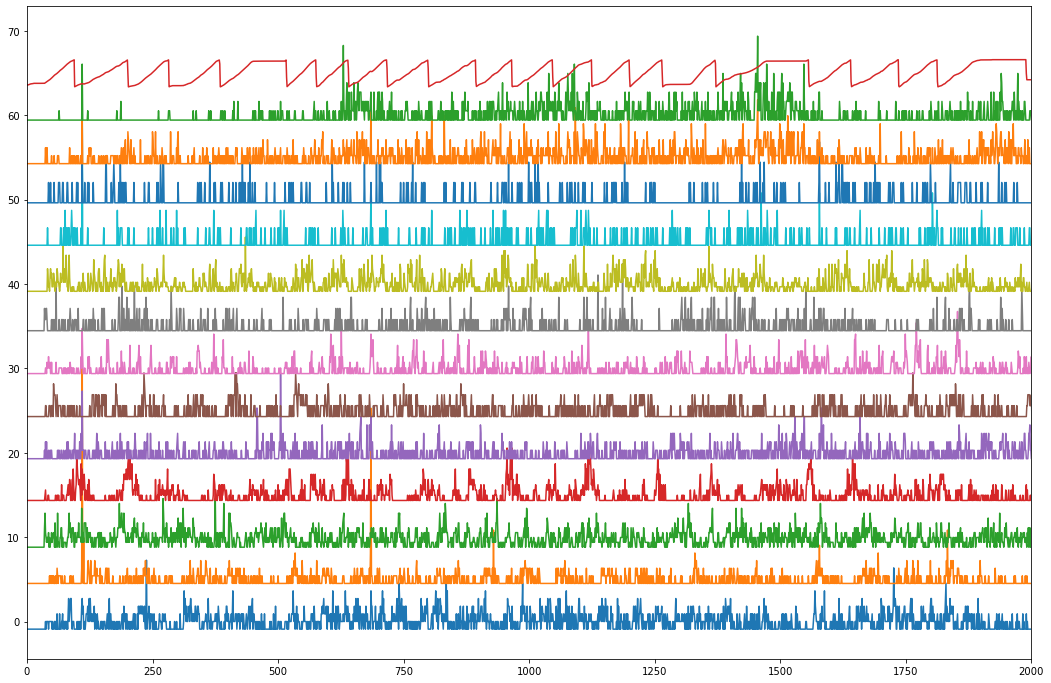

In [1]:
%run 01_load_data.ipynb

### Draw tuning curves of cells

In [2]:

df = pd.DataFrame(agg_buffer[:,:-1]*10) #convert spike count to firing rate, assume 100ms time bin

pos = agg_buffer[:,-1]
pos_scaled = preprocessing.minmax_scale(pos,(0,200))
df['pos'] = pos_scaled

bins = np.arange(0,205,5)
pos_binned = np.digitize(pos_scaled,bins,right=True)
pos_binned[pos_binned==0] = 1 # take care of samples outside bin range
df['pos_binned'] = pos_binned*5

# filter by speed
speed = np.diff(df.pos,prepend=df.pos[0])
df['speed']= speed*10
df_clean = pd.melt(df,id_vars=['pos','speed','pos_binned'],var_name='neuron',value_name='firingRate') # change to long format for easier plotting
df_clean

,pos,speed,pos_binned,neuron,firingRate
0,13.782464,0.000000,15,0,0.0
1,14.207773,4.253087,15,0,0.0
2,14.539044,3.312716,15,0,0.0
3,15.498220,9.591755,20,0,0.0
4,17.182740,16.845200,20,0,0.0
...,...,...,...,...,...
39320,135.288506,19.310190,140,12,30.0
39321,137.406027,21.175208,140,12,0.0
39322,139.143199,17.371716,140,12,0.0
39323,141.242201,20.990026,145,12,0.0


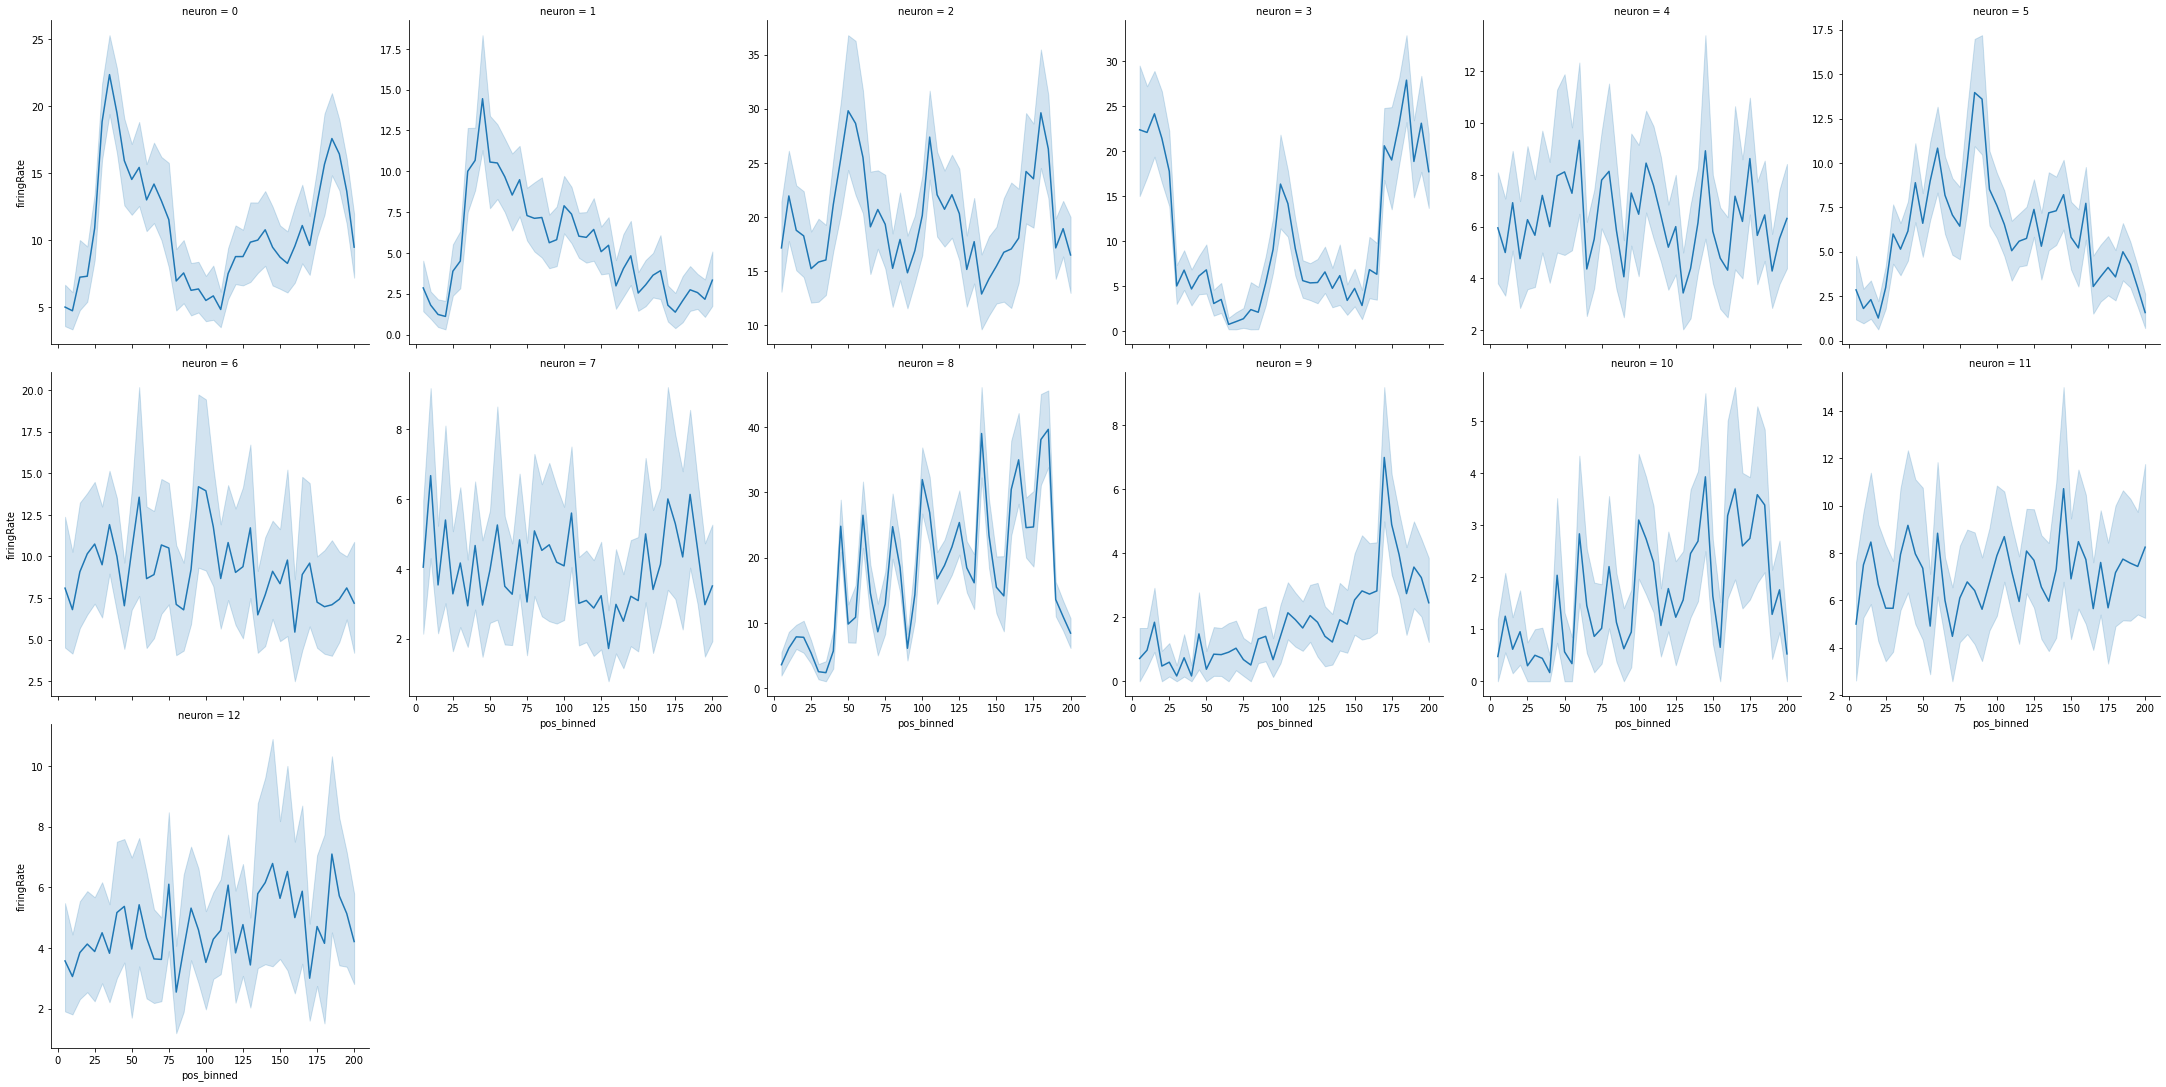

In [3]:
df2 = df_clean[df_clean.speed>3] #filter by speed
sns.relplot(x='pos_binned',y='firingRate',col='neuron', col_wrap=6,kind='line',facet_kws=dict(sharey=False), data=df2)